In [1]:
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# You need to set the working directory to where you have your shapefile data
os.chdir('/Users/larakaren/Documents/CASA/Dissertation/Data/CSCL/')
CSCL_ALL= gpd.read_file('geo_export.shp')

In [4]:
CSCL_1 = CSCL_ALL[CSCL_ALL.borocode =='1']

In [6]:
CSCL_2 = CSCL_1[CSCL_1.status =='2']


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13630 entries, 0 to 120125
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   bike_lane   3927 non-null   object  
 1   bike_trafd  3902 non-null   object  
 2   borocode    13630 non-null  object  
 3   date_creat  13630 non-null  object  
 4   time_creat  13630 non-null  object  
 5   frm_lvl_co  13630 non-null  float64 
 6   full_stree  13630 non-null  object  
 7   l_blkfc_id  13630 non-null  float64 
 8   l_high_hn   7593 non-null   object  
 9   l_low_hn    7593 non-null   object  
 10  l_zip       13216 non-null  object  
 11  date_modif  13505 non-null  object  
 12  time_modif  13505 non-null  object  
 13  physicalid  13630 non-null  float64 
 14  post_direc  207 non-null    object  
 15  post_modif  188 non-null    object  
 16  post_type   11431 non-null  object  
 17  pre_direct  3466 non-null   object  
 18  pre_modifi  20 non-null     object  


In [7]:
CSCL_3 = CSCL_2[['physicalid','st_label', 'shape_leng', 'post_type', 'geometry']]

In [8]:
CSCL_4 = CSCL_3[CSCL_3.post_type != 'TRL']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'OVAL']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'WALK']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'BRG']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'UPAS']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'OPAS']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'LOOP']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'TUNL']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'RTE']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'N']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'APPR']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'ROW']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'PATH']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'HL']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'PKWY']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'ESPL']
CSCL_4 = CSCL_4[CSCL_3.post_type != 'LN']

/Users/larakaren/opt/anaconda3/envs/urbsim/lib/python3.7/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


In [10]:
os.chdir('/Users/larakaren/Documents/CASA/Dissertation/Data/')
CSCL_4.to_file(filename='CSCL_MN.zip', driver='ESRI Shapefile') 

In [12]:
os.chdir('/Users/larakaren/Documents/CASA/Dissertation/Data/CSCL_MN')

# creating a graph from the shapefile
g_shp=nx.read_shp('CSCL_MN.shp',geom_attrs=False) 

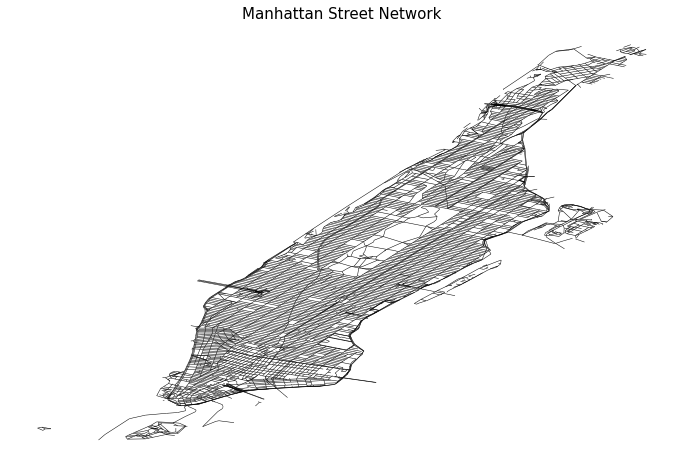

In [39]:
# Plotting the street network

# extracting coordinates from the nodes
pos_shp = {xy: xy for xy in g_shp.nodes()}


fig, ax = plt.subplots(figsize=(12,8))
pos=pos_shp

nx.draw_networkx_nodes(g_shp,pos,node_size=0.00,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
plt.axis("off")
plt.title("Manhattan Street Network",fontsize=15)
plt.show()

In [15]:
# edges attributes:
list(g_shp.edges(data = True))[0]

((-74.01793061274537, 40.706174865639746),
 (-74.01757437049282, 40.706839867152155),
 {'physicalid': 3.0,
  'st_label': 'BATTERY PL',
  'shape_leng': 262.77781228,
  'post_type': 'PL',
  'ShpName': 'CSCL_MN'})

In [16]:
# nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-74.01793061274537, 40.706174865639746), {}),
 ((-74.01757437049282, 40.706839867152155), {}),
 ((-74.01712051881411, 40.70746253088075), {}),
 ((-74.01662578576105, 40.708133934649545), {}),
 ((-74.01693786186667, 40.704813986596974), {}),
 ((-74.01704963744208, 40.70483662931333), {}),
 ((-74.01428922948978, 40.70454907535253), {}),
 ((-74.014961252156, 40.70475979724391), {}),
 ((-74.01739796591468, 40.708457409947115), {}),
 ((-74.01814846679568, 40.70879516565622), {})]

In [17]:
# renaming edges:

nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='st_label')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='st_label')}

nod_all = {**nod_st1, **nod_st2}


nx.set_node_attributes(g_shp,nod_all,'street')

# get the nodes attributes:
list(g_shp.nodes(data=True))[0:10]

[((-74.01793061274537, 40.706174865639746), {'street': 'BATTERY PL'}),
 ((-74.01757437049282, 40.706839867152155), {'street': '2 PL'}),
 ((-74.01712051881411, 40.70746253088075), {'street': '3 PL'}),
 ((-74.01662578576105, 40.708133934649545), {'street': 'W THAMES ST'}),
 ((-74.01693786186667, 40.704813986596974), {'street': 'BATTERY PL'}),
 ((-74.01704963744208, 40.70483662931333),
  {'street': 'HUDSON RIVER GREENWAY'}),
 ((-74.01428922948978, 40.70454907535253), {'street': 'STATE ST'}),
 ((-74.014961252156, 40.70475979724391), {'street': 'BATTERY PL'}),
 ((-74.01739796591468, 40.708457409947115), {'street': 'S END AVE'}),
 ((-74.01814846679568, 40.70879516565622), {'street': 'W THAMES ST'})]

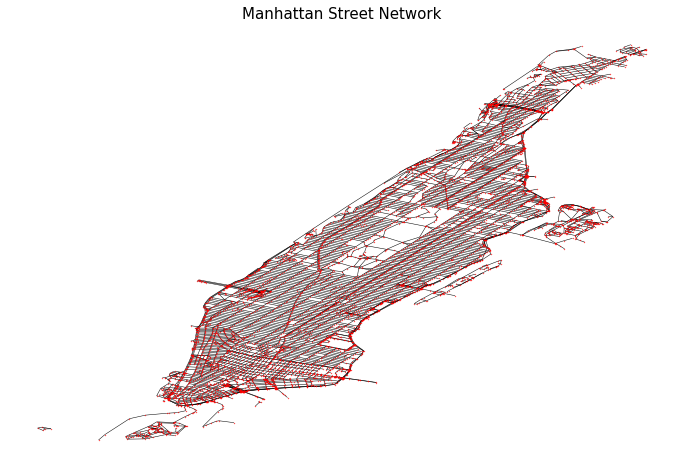

In [19]:


fig, ax = plt.subplots(figsize=(12,8))

node_labels = nx.get_node_attributes(g_shp, 'station')

nx.draw_networkx_nodes(g_shp,pos,node_size=0.1,node_color='r')
nx.draw_networkx_edges(g_shp,pos,arrows=False,width=0.5)
nx.draw_networkx_labels(g_shp,pos, node_labels, font_size=5,font_color='black')

plt.title("Manhattan Street Network",fontsize=15)
plt.axis("off")
plt.show()

In [20]:
type(g_shp)

networkx.classes.digraph.DiGraph

In [21]:
# transform to undirected
g_shp_un = g_shp.to_undirected()

In [22]:
print(nx.info(g_shp_un))

Name: 
Type: Graph
Number of nodes: 7044
Number of edges: 11181
Average degree:   3.1746


In [26]:
# Edge betweenness centrality
bet_london_e=nx.edge_betweenness_centrality(g_shp_un, normalized=False, weight='shape_leng')
# adding these values to the edges attributes:
nx.set_edge_attributes(g_shp_un,bet_london_e,'betweenness_e')

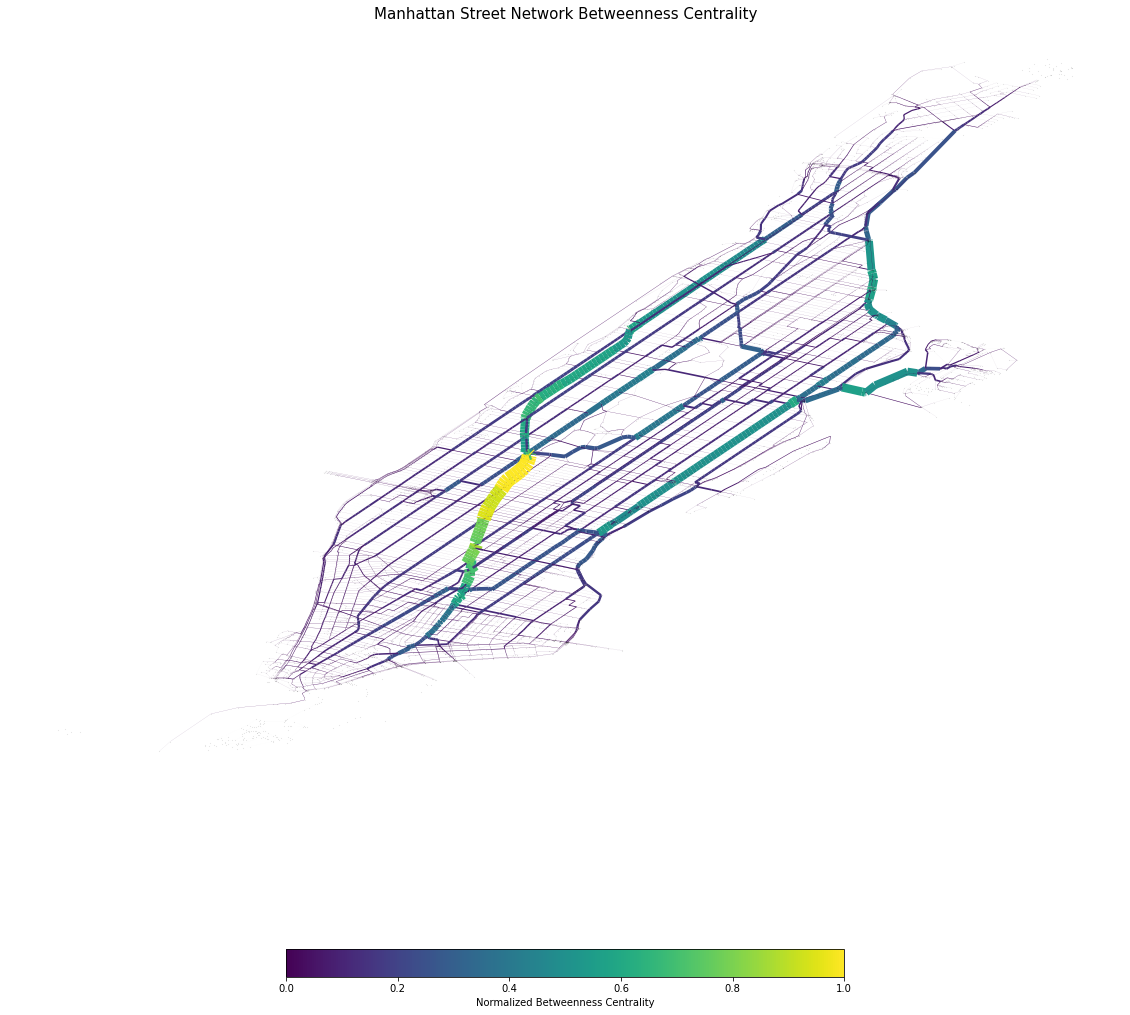

In [37]:
# setting color and width of edges according to betweenness values
betweenness_e_values=[(i[2]['betweenness_e']) for i in g_shp_un.edges(data=True)]

bet_e_color=[(i[2]['betweenness_e']/max(betweenness_e_values)) for i in g_shp_un.edges(data=True)]
bet_e_width=[(i[2]['betweenness_e']/max(betweenness_e_values)*15) for i in g_shp_un.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(20,20))

edg=nx.draw_networkx_edges(g_shp_un, pos,edge_color=bet_e_color, width=bet_e_width)

nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= 'black',
        node_size= 0.001)

plt.colorbar(edg,label="Normalized Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Manhattan Street Network Betweenness Centrality",fontsize=15)
plt.show()

In [97]:
nx.write_shp(g_shp_un,'file')

RuntimeError: Invalid field name: 'betweenness_e'

In [85]:
### Weighted betweenness centrality:

#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.edge_betweenness_centrality(g_shp_un, weight='shape_leng', normalized=False)
# We can add these values to the nodes attributes:
nx.set_edge_attributes(g_shp_un,bet_london_w,'betweenness_w')


pd.DataFrame.from_dict(bet_london_w,columns=['betweenness_w'],orient='index')[0:10]

KeyboardInterrupt: 

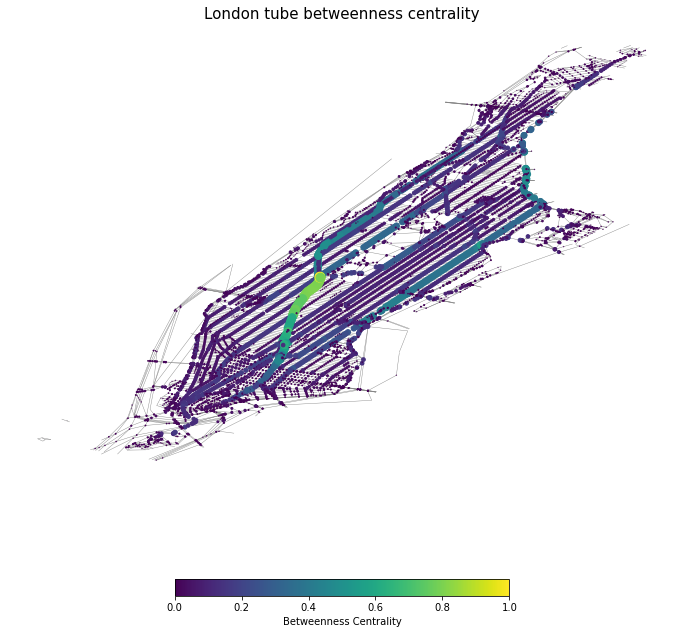

In [32]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in g_shp_un.edges(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in g_shp_un.edges(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values)*100) for i in g_shp_un.edges(data=True)]


# Plot graph 

# here were using the proper coordinates and not spring layout
pos=pos_shp

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(g_shp_un, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(g_shp_un,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube betweenness centrality",fontsize=15)
plt.show()